In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tqdm.notebook as tq
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/comments/player/sentiment/Kane_Premier_sentiment.csv')
emb = pd.read_csv('../data/Kane_Premier_embedding_MinMax.csv')

In [3]:
sent = df.groupby('author')['sentiment_score'].mean()

In [4]:
emb

,Chiraqology,MADFUT,MCUTheories,MatchAttax,PopSmoke,SquaredCircle,cobrakai,fantasybooking,fixingmovies,ksi,...,malefashionadvice,meat,midcenturymodern,motorcycles,phillycycling,scifi,scrabble,workfromhome,xbiking,author
0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AFC-Zain
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Adamdel34
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Asriel_1985
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AweDaw76
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BTbenTR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,volanger
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wallyrules75
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wayofthegenttickle
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,xkcdthrowaway


In [5]:
emb_woa = emb.drop(columns=['author'])

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(emb_woa)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [7]:
principalDf['author'] = emb['author']
principalDf

,principal component 1,principal component 2,author
0,-1.069958,-0.155867,AFC-Zain
1,-0.310388,-0.219460,Adamdel34
2,-0.509122,-0.268473,Asriel_1985
3,5.277361,-1.096725,AweDaw76
4,-0.469293,0.214992,BTbenTR
...,...,...,...
94,0.618500,-0.288338,volanger
95,1.313884,-1.216235,wallyrules75
96,0.775393,-1.418528,wayofthegenttickle
97,-0.833144,-0.012255,xkcdthrowaway


In [8]:
pd.set_option('display.max_rows', 100)
principalDf

,principal component 1,principal component 2,author
0,-1.069958,-0.155867,AFC-Zain
1,-0.310388,-0.219460,Adamdel34
2,-0.509122,-0.268473,Asriel_1985
3,5.277361,-1.096725,AweDaw76
4,-0.469293,0.214992,BTbenTR
5,-0.841592,0.478497,Bakio-bay
6,-0.545946,0.729463,BendubzGaming
7,-0.002384,-0.043885,BlacknWhiteMoose
8,0.678706,0.149703,Brilliant-Win4152
9,-0.346226,1.232528,Catdog2008


In [9]:
authors = pd.read_csv('../data/author/Kane_Premier_author.csv')

In [10]:
authors = authors.set_index('author')

In [11]:
senti = sent.reset_index()

df_senti = senti.loc[senti.author.isin(emb['author'])]

In [12]:
#df_senti = df_senti.reset_index()
count = []
for i in range(df_senti.shape[0]):
    count.append(authors.loc[df_senti.author.iloc[i]]['count'])
df_senti['count'] = count

/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
df_senti

,author,sentiment_score,count
47,AFC-Zain,0.325487,8
86,Adamdel34,0.329375,8
174,Asriel_1985,0.028435,20
185,AweDaw76,0.215790,10
197,BTbenTR,0.288623,13
205,Bakio-bay,0.542971,7
229,BendubzGaming,0.255763,16
261,BlacknWhiteMoose,0.109188,8
286,Brilliant-Win4152,0.158100,8
333,Catdog2008,0.268843,7


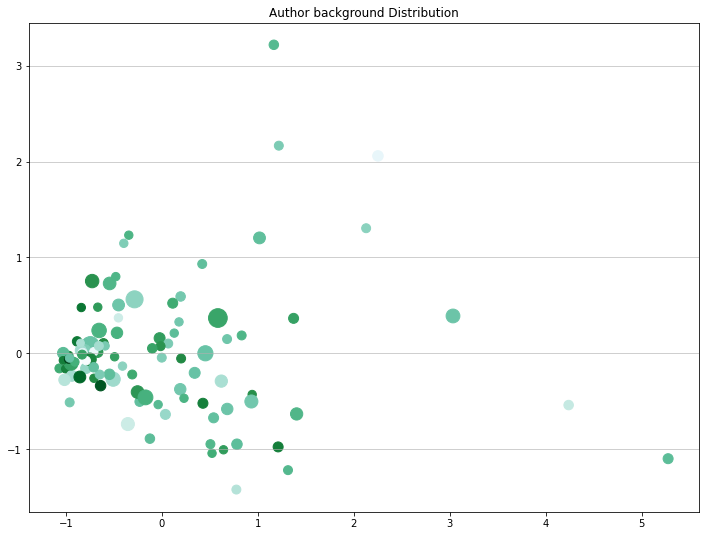

In [16]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

plt.grid(axis='y', alpha=0.75)

ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=df_senti['sentiment_score'],s = df_senti['count']*10,cmap='BuGn')
plt.title('Author background Distribution')
plt.show()